In [1]:
from sklearn.datasets import load_iris, load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score
import joblib
import numpy as np
import os
import pandas as pd

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [7]:
print("Image Data Shape:", load_digits().images.shape)
print("Image Data Shape:", load_digits().data.shape)
print("Label Data Shape:", load_digits().target.shape)

Image Data Shape: (1797, 8, 8)
Image Data Shape: (1797, 64)
Label Data Shape: (1797,)


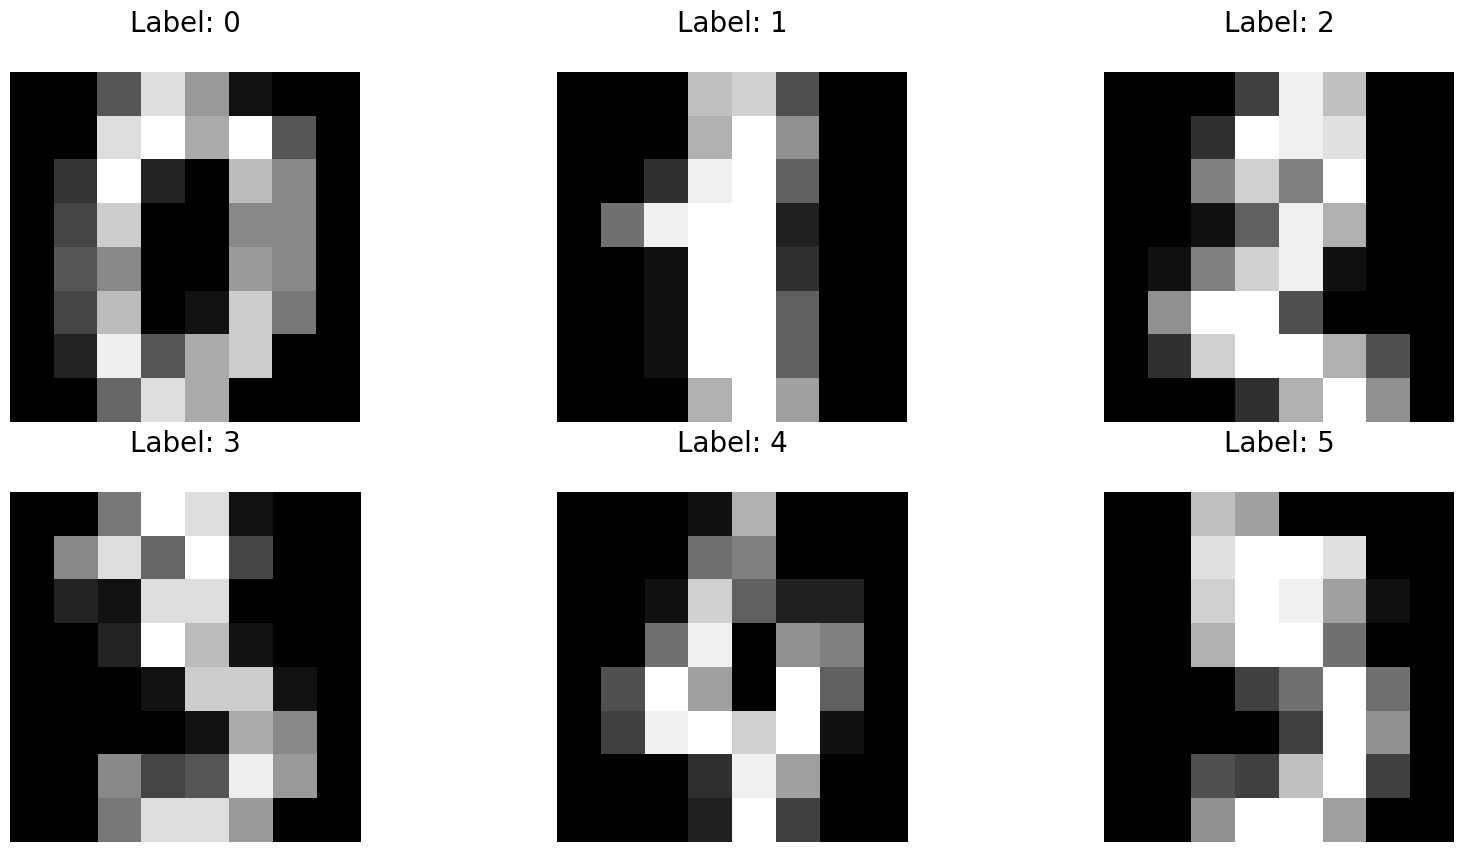

In [8]:
plt.figure(figsize=(20,10))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(load_digits().images[i], cmap='gray')
    plt.title('Label: %i\n' % load_digits().target[i], fontsize = 20)
    plt.axis('off')
plt.show()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(load_digits().data, load_digits().target, test_size=0.25, random_state=42)

In [10]:
print(X_train.shape)

(1347, 64)


In [11]:
print(X_test.shape)

(450, 64)


In [12]:
print(y_train.shape)

(1347,)


In [13]:
print(y_test.shape)

(450,)


In [14]:
log_reg = LogisticRegression(solver='liblinear', multi_class='ovr')

In [15]:
log_reg.fit(X_train, y_train)

c:\Users\meher\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\meher\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,100
,multi_class,'ovr'


In [16]:
print(log_reg.predict(X_test))

[6 9 3 7 2 1 5 2 5 2 1 8 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 4 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 1 9 2 7 8 7 2 6 9 4 0 7 2 7 5 8 7 5 7 9 0 6 6 4 2 8 0 9 4 6 9 9 6 9
 0 5 5 6 6 0 6 4 3 9 3 8 7 2 9 0 4 5 3 6 5 8 9 8 4 2 1 3 7 7 2 2 3 9 8 0 3
 2 2 5 6 9 9 4 1 2 4 2 3 6 4 8 5 9 5 7 8 9 4 8 1 5 4 4 9 6 1 8 6 0 4 5 2 7
 1 6 4 5 6 0 3 2 3 6 7 1 9 1 4 7 6 5 8 5 5 1 5 2 8 8 9 9 7 6 2 2 2 3 4 8 8
 3 6 0 9 7 7 0 1 0 4 5 8 5 3 6 0 4 1 0 0 3 6 5 9 7 3 5 5 9 9 8 5 3 3 2 0 5
 8 3 4 0 2 4 6 4 3 4 5 0 5 2 1 3 1 4 1 1 7 0 1 5 2 1 2 8 7 0 6 4 8 8 5 1 8
 4 5 8 7 9 8 8 0 6 2 0 7 9 1 9 5 2 7 7 1 8 7 4 3 8 3 5 6 0 0 3 0 5 0 0 4 1
 2 8 4 5 9 6 3 1 8 8 4 2 3 8 9 8 8 5 0 6 3 3 7 1 6 4 1 2 1 1 6 4 7 4 8 3 4
 0 5 1 9 4 5 7 6 3 7 0 5 9 7 5 9 7 4 2 1 9 0 7 5 8 3 6 3 9 6 9 5 0 1 5 5 8
 3 3 6 2 6 5]


In [17]:
print(log_reg.predict(X_test[0].reshape(1, -1)))

[6]


In [18]:
print("Logistic Regression for first 10 test samples:\n", log_reg.predict(X_test[:10]))

Logistic Regression for first 10 test samples:
 [6 9 3 7 2 1 5 2 5 2]


In [19]:
pred = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", metrics.accuracy_score(y_test, pred))

Logistic Regression Accuracy: 0.9666666666666667


In [20]:
score = log_reg.score(X_test, y_test)
print("Logistic Regression Score:", score)

Logistic Regression Score: 0.9666666666666667


[[42  0  0  0  1  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  1  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 44  0  1  0  0  1  0]
 [ 0  1  0  0 54  0  0  0  0  0]
 [ 0  0  1  0  0 56  0  0  1  1]
 [ 0  0  0  0  0  1 44  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  1]
 [ 0  1  0  0  0  1  0  0 36  0]
 [ 0  0  0  0  0  0  0  0  3 45]]


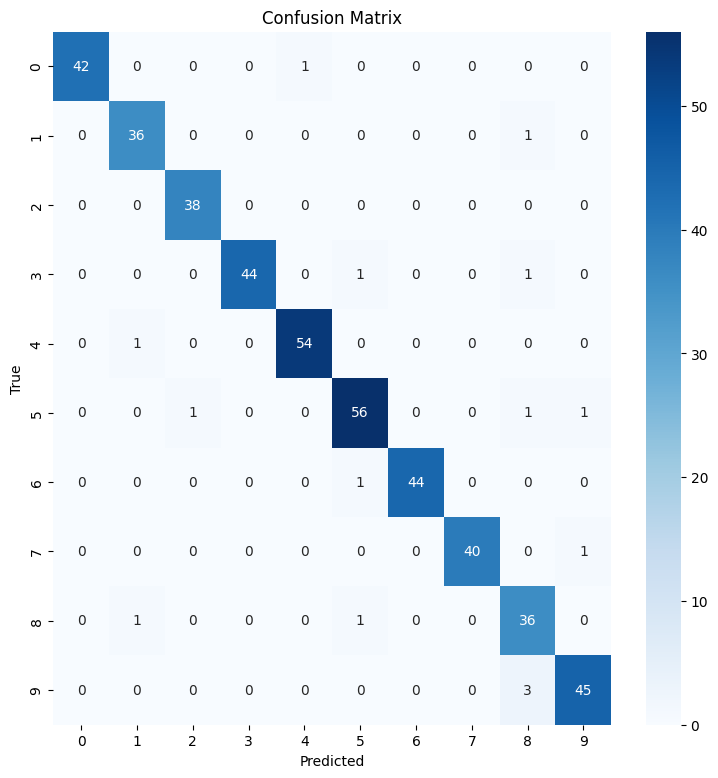

In [21]:
cm = metrics.confusion_matrix(y_test, pred)
print(cm)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()